<a href="https://colab.research.google.com/github/mahireddy1318/Assignment-Mahesh-Reddy/blob/main/Wheat_disease_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip '/content/drive/MyDrive/Datasets/wheat_data.zip'

Archive:  /content/drive/MyDrive/Datasets/wheat_data.zip
   creating: wheat_data/Brown_rust/
  inflating: wheat_data/Brown_rust/Brown_rust001.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust002.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust003.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust004.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust005.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust006.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust007.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust008.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust009.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust010.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust011.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust012.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust013.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust014.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust015.jpg  
  inflating: wheat_data/Brown_rust/Brown_rust016.jpg  
  inflating: wheat_data/Bro

In [3]:
data_path = '/content/wheat_data'

In [4]:
!pip install split-folders

In [5]:
import splitfolders
splitfolders.ratio('wheat_data', output="Wheat_data_splitted", seed=1, ratio=(0.8, 0.1,0.1)) #train, val, test

Copying files: 3679 files [00:06, 541.96 files/s] 


In [6]:
import glob
data_dir = '/content/Wheat_data_splitted'
Total_train_data = glob.glob(data_dir+'/train/*/*')
Total_val_data = glob.glob(data_dir+'/val/*/*')
Total_test_data = glob.glob(data_dir+'/test/*/*')
print(f'Total images for Training {len(Total_train_data)},\nTotal images for Validation : {len(Total_val_data)},\nTotal images for Testing : {len(Total_test_data)} ')

Total images for Training 2942,
Total images for Validation : 366,
Total images for Testing : 371 


Width : 1391, Height:706
Class_name:Healthy


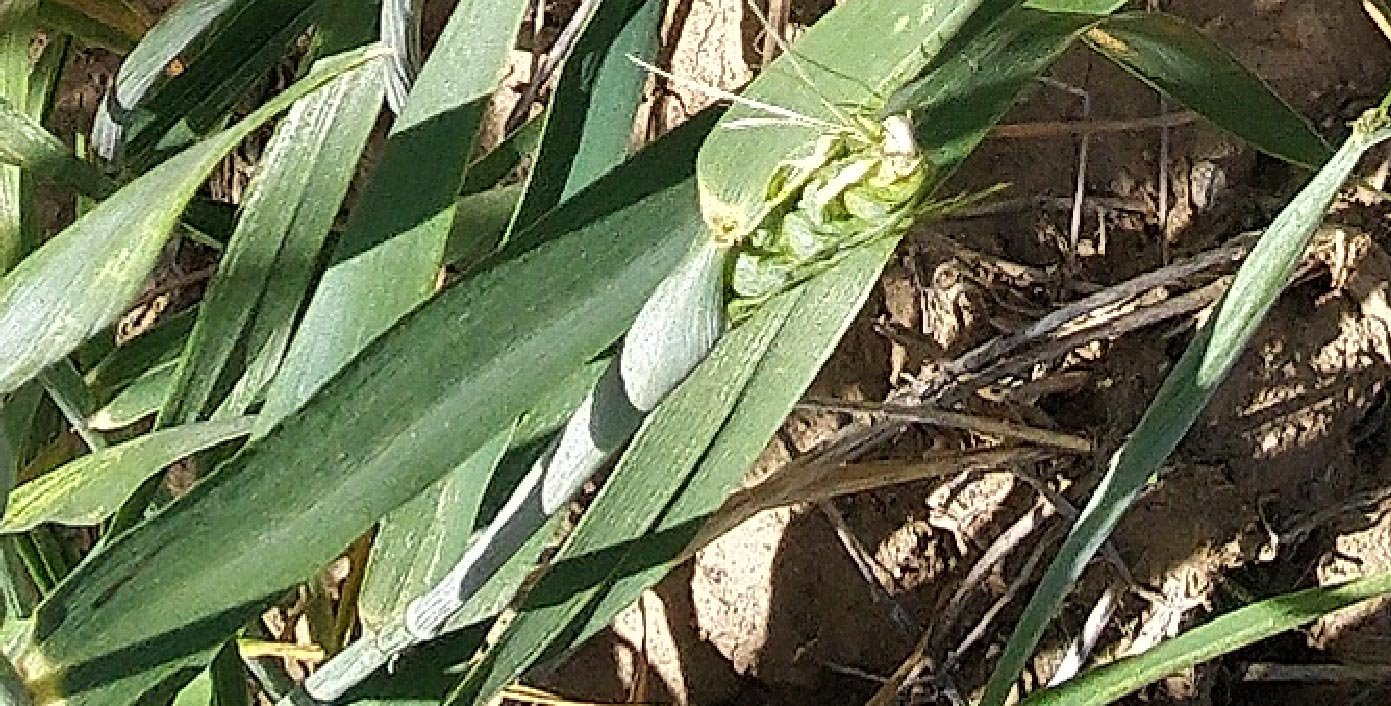

In [11]:
from PIL import Image
im = Image.open(Total_train_data[33])
w, h = im.size
class_ = Total_train_data[33].split('/')[-2]

print(f'Width : {w}, Height:{h}')
print(f'Class_name:{class_}')
im

In [12]:
class_names = {0:'Brown_rust', 1:'Healthy', 2:'Yellow_rust'}
class_names

{0: 'Brown_rust', 1: 'Healthy', 2: 'Yellow_rust'}

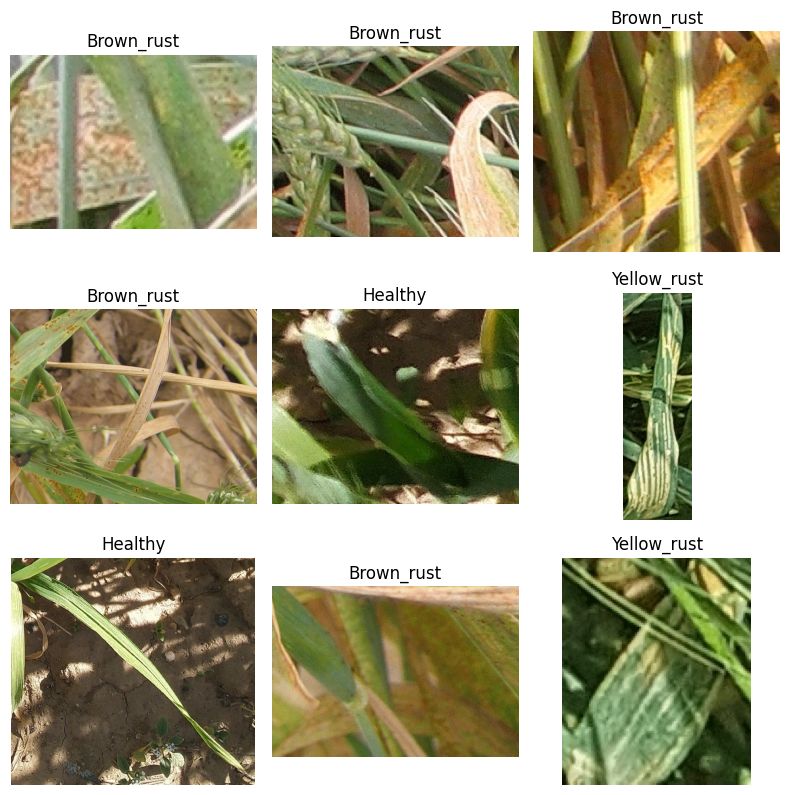

In [13]:

import os
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt


global_path = glob.glob(data_dir+'/*/*/*.jpg')

random_paths = random.choices(global_path, k=9)

# Create a new figure
plt.figure(figsize=(8, 8))

# Plot the images
for i, image_file in enumerate(random_paths[:9]):
    #print(image_file)

    image = Image.open(image_file)

    # Add subplot with 3 rows, 3 columns, and i+1 index
    plt.subplot(3, 3, i + 1)

    # Plot the image
    plt.imshow(image)
    plt.title(image_file.split('/')[-2])  # Set the title as the file name
    plt.axis('off')  # Turn off axis labels

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [14]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, AveragePooling2D

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.losses import CategoricalCrossentropy

In [15]:
#train_ds = tf.keras.utils.image_dataset_from_directory #if you want use data
batch_size = 32
img_height = 256
img_width = 256


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [16]:
train_generator = train_datagen.flow_from_directory(
    '/content/Wheat_data_splitted/train',
    target_size=(img_width, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle = True
)

# Load the validation dataset
validation_generator = test_datagen.flow_from_directory(
    '/content/Wheat_data_splitted/val',
    target_size=(img_width, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/content/Wheat_data_splitted/test',
    target_size=(img_width, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 2942 images belonging to 3 classes.
Found 366 images belonging to 3 classes.
Found 371 images belonging to 3 classes.


In [17]:
class_names = list(train_generator.class_indices.keys())
class_names

['Brown_rust', 'Healthy', 'Yellow_rust']

In [18]:
#total_batches = train_generator.n // train_generator.batch_size
print("Total number of  train batches:", len(train_generator))
print("Total number of  validation batches:", len(validation_generator))
print("Total number of  validation batches:", len(test_generator))

Total number of  train batches: 92
Total number of  validation batches: 12
Total number of  validation batches: 12


(32, 256, 256, 3) (32, 3)


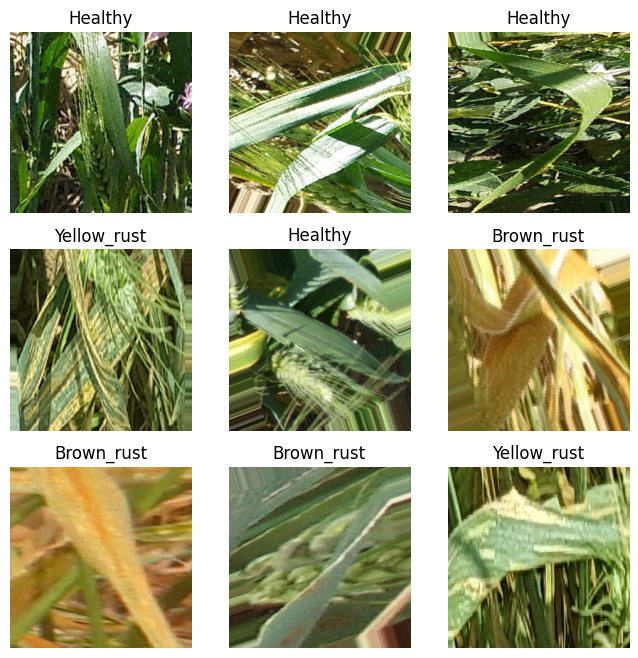

In [19]:
import matplotlib.pyplot as plt

# Determine figure size as 10 by 10
plt.figure(figsize=(8, 8))

# Take image from train_ds
images, labels = train_generator.next()
print(images.shape, labels.shape)
# Plot the images
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    # Plot image using imshow
    plt.imshow(images[i])
    plt.title(class_names[int(labels[i].argmax())])  # Assuming class_names is defined as described earlier
    plt.axis("off")

plt.show()


In [20]:
ResNet_model = Sequential()

pretrained_model = tf.keras.applications.ResNet50(
    include_top = False,
    input_shape = (256,256,3),
    pooling = 'avg',
    classes = 3,
    weights = 'imagenet'
)

94765736/94765736 [==============================] - 0s 0us/step


In [21]:
for layer in pretrained_model.layers:
    layer.trainable = False

ResNet_model.add(pretrained_model)

In [22]:
ResNet_model.add(Flatten())
ResNet_model.add(Dense(512, activation='relu'))
ResNet_model.add(Dense(64, activation='relu'))
ResNet_model.add(Dense(3, activation='softmax'))

In [23]:
ResNet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 24669827 (94.11 MB)
Trainable params: 1082115 (4.13 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [24]:
ResNet_model.compile(loss = 'CategoricalCrossentropy', optimizer = Adam(learning_rate=0.001), metrics = ['accuracy'])

In [25]:
from keras.callbacks import ModelCheckpoint
#create callback
from pathlib import Path
Path('/saved_models').mkdir(parents=True, exist_ok=True)

filepath = '/content/saved_models/best_model0.hdf5'
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint]

#fit the model
history = ResNet_model.fit(train_generator,
                  batch_size=batch_size,
                  epochs=30,
                  validation_data = validation_generator,
                  callbacks=callbacks)


Epoch 1/30
92/92 [==============================] - ETA: 0s - loss: 0.7484 - accuracy: 0.6727
Epoch 1: val_loss improved from inf to 0.53186, saving model to /content/saved_models/best_model0.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


92/92 [==============================] - 70s 661ms/step - loss: 0.7484 - accuracy: 0.6727 - val_loss: 0.5319 - val_accuracy: 0.8060
Epoch 2/30
92/92 [==============================] - ETA: 0s - loss: 0.5612 - accuracy: 0.7736
Epoch 2: val_loss did not improve from 0.53186
92/92 [==============================] - 58s 635ms/step - loss: 0.5612 - accuracy: 0.7736 - val_loss: 0.5624 - val_accuracy: 0.8060
Epoch 3/30
92/92 [==============================] - ETA: 0s - loss: 0.5335 - accuracy: 0.7916
Epoch 3: val_loss improved from 0.53186 to 0.46297, saving model to /content/saved_models/best_model0.hdf5
92/92 [==============================] - 86s 925ms/step - loss: 0.5335 - accuracy: 0.7916 - val_loss: 0.4630 - val_accuracy: 0.8361
Epoch 4/30
92/92 [==============================] - ETA: 0s - loss: 0.4843 - accuracy: 0.8158
Epoch 4: val_loss improved from 0.46297 to 0.44318, saving model to /content/saved_models/best_model0.hdf5
92/92 [==============================] - 61s 662ms/step - los

<function matplotlib.pyplot.show(close=None, block=None)>

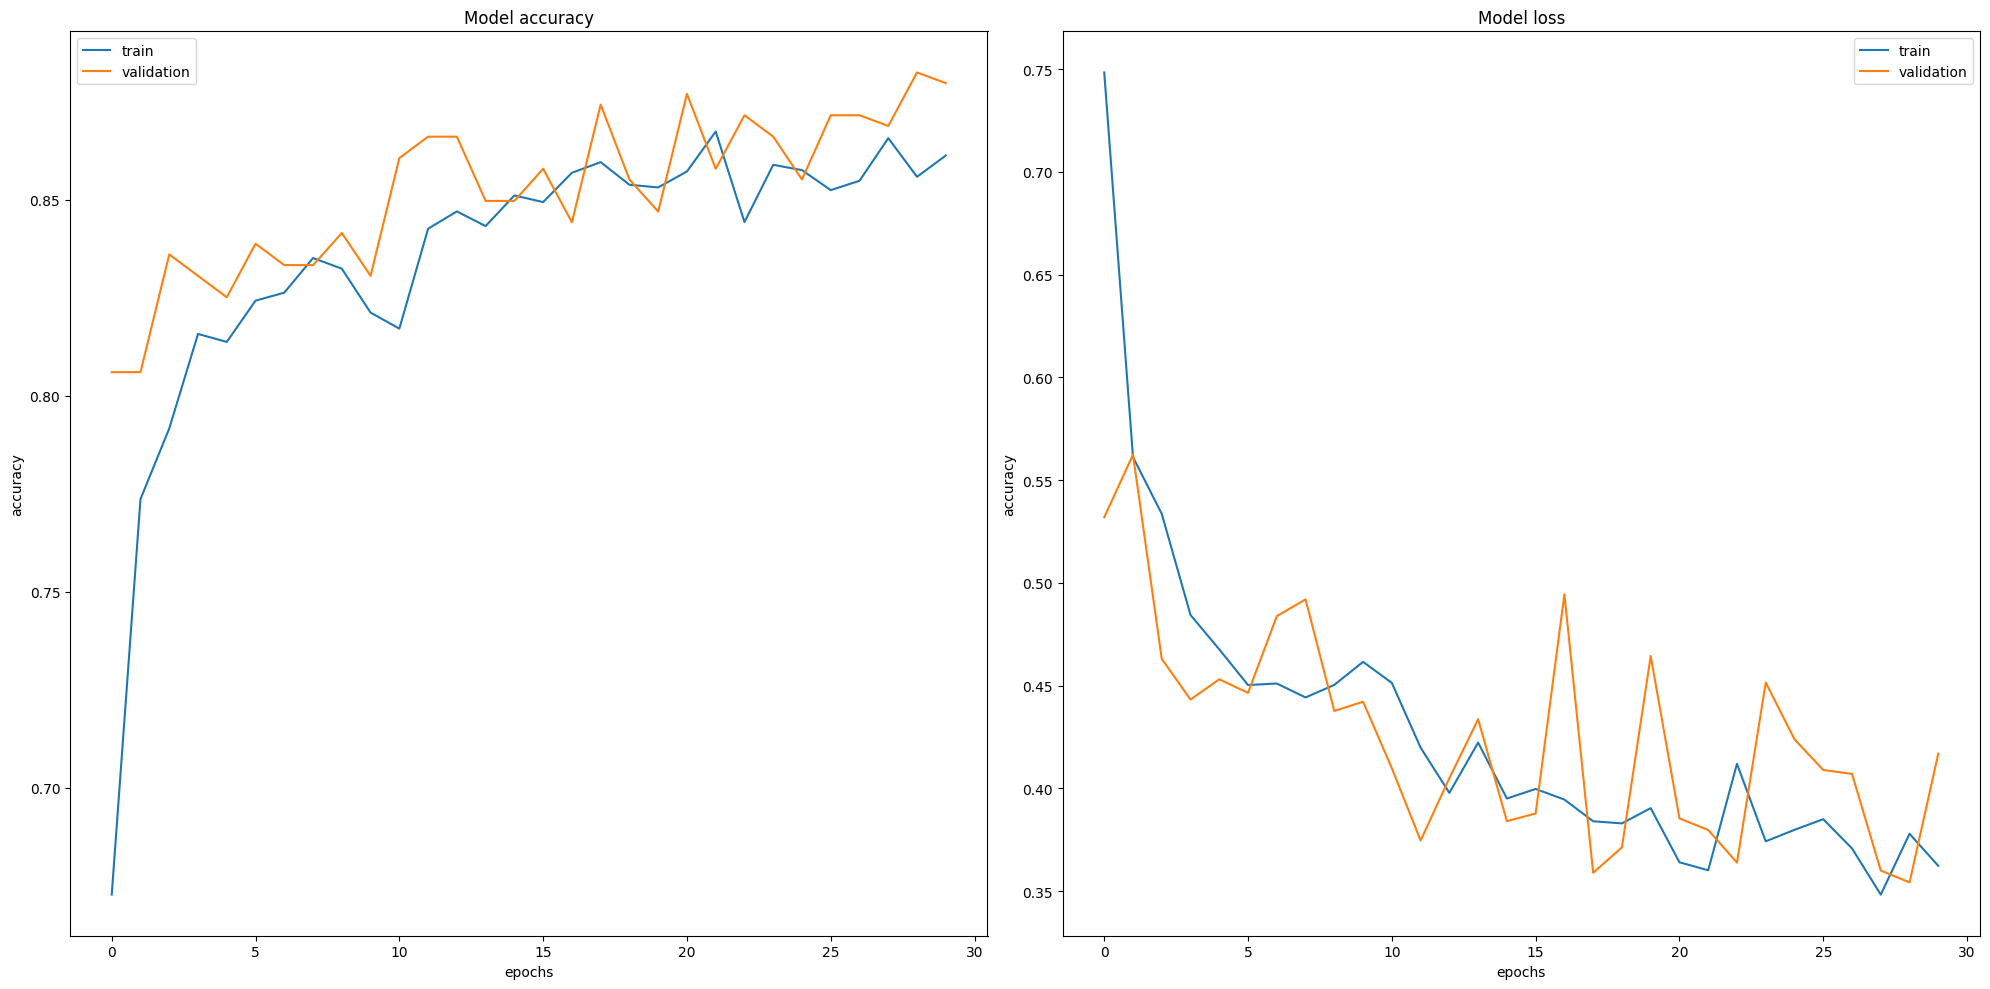

In [32]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
#plt.axis(ymin=0.5, ymax=1.0)
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
#plt.axis(ymin=0.5, ymax=1.0)
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])
plt.tight_layout()
plt.show

In [ ]:
aaaa

NameError: name 'aaaa' is not defined

In [ ]:
import cv2
import glob as glob
img_path = r'C:\Users\7000029680\Desktop\DeepLearning\classification\intel_images\seg_pred'
import os
import glob
images = glob.glob(img_path+'\\*')
for i in range(9):
    plt.subplot(3,3,i+1)
    print(images[i])

    image = cv2.imread(images[i])
    #print(image.shape)
    image_resized = cv2.resize(image , (image_height, image_height))
    #print(image_resized.shape)
    image = np.expand_dims(image_resized, axis=0)
    #print(image.shape)
    pred = ResNet_model.predict(image)
    #print(pred)

    output = class_names[np.argmax(pred)]
    #output
    plt.imshow(image_resized)
    plt.title(output)
    plt.axis('off')

In [ ]:
pred = ResNet_model.predict(image)
print(pred)

In [ ]:
output = class_names[np.argmax(pred)]
output

In [ ]:
plt.imshow(image_resized)
plt.title(output)
plt.axis('off')

In [ ]:

image_height = 512
image_weight = 512
batch_size = 32
test_dr = r'C:\Users\7000029680\Desktop\DeepLearning\classification\intel_images\seg_test'
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dr,
    label_mode = 'categorical',
    batch_size = batch_size,
    image_size = (image_height, image_height),
    seed = 123
)

In [ ]:

plt.figure(figsize=(6, 6))
for img, label in test_ds.take(1):
    for i in range(4):
        plt.subplot(2, 2, i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        plt.title(class_names[np.argmax(label[i])])


In [33]:
import os
test_path = '/content/Wheat_data_splitted/test'

for dirpath, dirnames, filenames in os.walk(test_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 3 directories and 0 images in '/content/Wheat_data_splitted/test'.
There are 0 directories and 140 images in '/content/Wheat_data_splitted/test/Healthy'.
There are 0 directories and 114 images in '/content/Wheat_data_splitted/test/Brown_rust'.
There are 0 directories and 117 images in '/content/Wheat_data_splitted/test/Yellow_rust'.


In [34]:
import numpy as np
true_labels = []
for batch in range(len(test_generator)):
    batch_images, batch_labels = next(test_generator)
    argmax_batch_labels = [np.argmax(label) for label in batch_labels]
    true_labels.extend(argmax_batch_labels)

# Now all_argmax_labels contains argmax label values from all 3 batches in a single list
print(len(true_labels))


371


In [35]:
true_labels[:10]

[2, 2, 2, 1, 1, 0, 0, 0, 2, 2]

In [36]:
validation_labels = []
for i in range(len(test_generator)):
    _, labels = test_generator[i]
    labels = [np.argmax(label) for label in labels]
    validation_labels.extend(labels)

# Convert labels to a list
validation_labels = list(validation_labels)

In [37]:
len(validation_labels)

371

In [38]:
validation_labels[:10]

[2, 2, 2, 1, 1, 0, 0, 0, 2, 2]

In [ ]:
true = test_generator.classes.tolist()

In [ ]:
len(true)

371

In [39]:
results = ResNet_model.evaluate(test_generator)
print("test loss, test acc:", results)

12/12 [==============================] - 4s 306ms/step - loss: 0.3234 - accuracy: 0.8760
test loss, test acc: [0.32337868213653564, 0.8760107755661011]


In [ ]:
true = test_generator.classes

In [40]:
from keras.models import load_model
saved_model_path = '/content/saved_models/best_model0.hdf5'
model = load_model(saved_model_path)

In [41]:
pred = model.predict(test_generator)
pred

12/12 [==============================] - 4s 221ms/step


array([[9.5881894e-04, 9.9900705e-01, 3.4125846e-05],
       [2.5945516e-05, 9.9997270e-01, 1.2681105e-06],
       [8.0256802e-01, 1.8781944e-01, 9.6125286e-03],
       ...,
       [6.0933627e-02, 1.3716001e-02, 9.2535031e-01],
       [7.2901726e-01, 1.2697987e-02, 2.5828475e-01],
       [9.2465589e-03, 1.1382568e-01, 8.7692773e-01]], dtype=float32)

In [42]:
print(len(pred))

371


In [43]:
pred_labels = []
for pred_ in pred:
    pred_ = np.argmax(pred_)
    #print(pred)
    pred_labels.append(pred_)

In [44]:
len(pred_labels)

371

In [45]:
pred_labels[:10]

[1, 1, 0, 2, 1, 1, 2, 2, 1, 1]

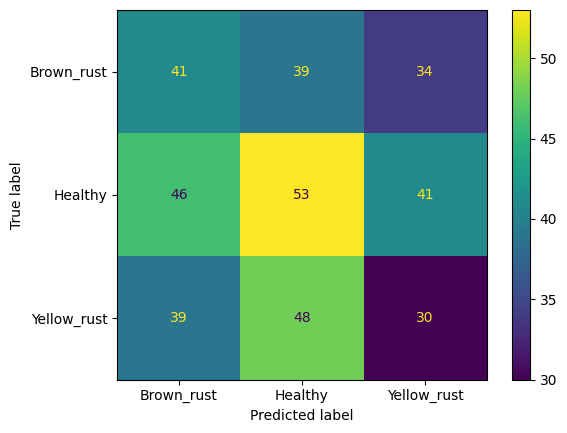

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(true_labels, pred_labels)
#print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=class_names)
disp.plot()
plt.show()


In [47]:
print(classification_report(true_labels, pred_labels, target_names=class_names))

              precision    recall  f1-score   support

  Brown_rust       0.33      0.36      0.34       114
     Healthy       0.38      0.38      0.38       140
 Yellow_rust       0.29      0.26      0.27       117

    accuracy                           0.33       371
   macro avg       0.33      0.33      0.33       371
weighted avg       0.33      0.33      0.33       371



In [ ]:
# def get_label(n):
#     for key, value in class_names.items():
#         if n ==value:
#             return key

# get_label(2)